In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel
from astropy.io import fits

In [2]:
import os
import sys
import logging

In [3]:
%matplotlib inline

In [4]:
plt.style.use('court.mplstyle')

In [5]:
highmass_rc_newvals = pd.read_csv('../datatables/highmass_rc_newvals.csv')
highmass_rc_newvals

,KIC,numax,pysyd_numax,e_pysyd_numax,new_numax,smooth_numax,Delnu,pysyd_dnu,e_pysyd_dnu,o_Teff,...,e_l1_vis,l2_vis,e_l2_vis,l3_vis,e_l3_vis,contamination_flag,crowdsap,RUWE,eff_obs_time,epsilon_collapsed
0,3347458,39.99,40.291621,0.904390,40.32,41.422682,3.360,3.362861,0.016179,5000,...,0.08,0.89,0.08,0.07,0.02,2,0.9980,0.957,110.0790,0.877934
1,8378545,48.82,47.769061,1.989659,48.07,48.952072,3.952,3.966159,0.022203,5058,...,0.09,0.42,0.05,0.08,0.08,2,1.0000,0.836,106.8120,0.860558
2,5978324,49.10,48.776551,0.974408,48.78,50.072904,4.024,4.072667,0.016443,5051,...,0.05,0.48,0.05,0.04,0.02,0,0.9971,2.542,117.4554,0.844961
3,10068490,66.42,58.662513,1.977989,58.84,60.906533,5.206,5.239133,0.046630,5189,...,0.14,0.55,0.07,0.20,0.04,0,0.9998,0.896,115.0200,0.876506
4,4756133,80.81,80.362852,2.357250,80.29,83.967767,5.865,5.998605,0.022750,5152,...,0.08,0.61,0.04,0.10,0.03,2,0.9952,0.936,86.7024,0.927727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,10162765,88.56,85.502602,2.118024,85.53,89.092562,6.760,6.801791,0.023959,4948,...,0.07,0.67,0.07,0.15,0.03,0,0.9996,6.019,93.9600,0.947856
111,3430048,35.82,33.626875,2.147042,33.63,37.856607,3.487,3.518327,0.034631,5079,...,0.47,0.75,0.15,0.18,0.06,2,0.9844,1.021,49.9500,1.002639
112,7116721,50.86,50.988298,1.581224,50.97,53.768334,4.522,4.514956,0.013743,5028,...,0.07,0.66,0.07,0.07,0.02,1,0.9930,0.979,117.4518,0.923077
113,7347076,90.59,90.713242,1.757715,90.65,94.236618,7.216,7.217619,0.034534,5386,...,0.12,0.58,0.07,0.13,0.02,0,0.9990,1.026,116.5266,1.106711


In [6]:
keck_data = pd.read_csv('../datatables/keck_data.csv')
keck_data

,KIC,numax,delta_nu,mass,Teff,logg,[Fe/H],adopt_flag,Kpmag,ra,dec,Teff_specmatch,logg_specmatch,feh_specmatch,vsini_specmatch,RV
0,3347458,40.291621,3.362861,4.958121,4863.000,2.5250,0.1650,apogee,10.30,292.77283,38.432480,4930.0,2.612985,0.320,4.297755,-54.42
1,8378545,47.769061,3.966159,4.432115,4984.000,2.9515,0.2400,avg,11.78,296.26709,44.371861,4960.0,2.712371,0.360,9.881992,NaN
2,5978324,48.776551,4.072667,4.265973,5051.000,2.7010,-0.0980,apogee,10.96,296.65195,41.222080,5036.0,2.993691,-0.080,5.309492,NaN
3,4756133,80.362852,5.998605,4.366603,5186.000,3.0140,0.0910,apogee,10.58,294.38312,39.844940,5024.0,3.110776,0.260,5.233387,NaN
4,7175316,41.488007,3.730429,3.524354,5007.000,2.5540,-0.0400,jie,9.00,281.97849,42.744141,4933.0,2.658837,0.330,4.728579,NaN
5,6599955,75.711091,5.870093,4.213744,5361.000,2.7690,0.1250,lamost,11.62,289.91006,42.086189,5263.0,2.925304,0.250,9.122755,NaN
6,3955502,24.714563,2.516171,3.720004,5052.000,2.4730,-0.0200,avg,12.27,291.83844,39.019402,4966.0,2.535091,0.280,9.505160,NaN
7,8037930,54.421681,4.776809,3.041234,5084.000,2.6860,0.2300,jie,13.45,294.91647,43.893661,4904.0,2.644786,0.300,4.212158,NaN
8,8569885,44.927632,4.024211,3.696699,5210.000,2.7400,0.1100,avg,9.04,295.49878,44.648548,5024.0,2.528742,0.280,7.814024,NaN
9,11518639,56.149591,4.610577,4.258156,5198.000,2.6560,-0.0100,jie,13.87,296.85648,49.456490,4934.0,2.701435,0.330,5.212670,NaN


In [7]:
spectrum_i = fits.open('/Users/ccra8514/Desktop/KeckHIRES_spectra/rj525.240.fits')
spectrum_i_rv = fits.open('/Users/ccra8514/Desktop/KeckHIRES_spectra/rj525.240_adj.fits')
# spectrum_i = fits.open('/Users/ccra8514/Desktop/KeckHIRES_spectra/rj525.95.fits')

# spectrum_i = fits.open('/Users/ccra8514/Desktop/KeckHIRES_spectra/bj525.240.fits')
# spectrum_i = fits.open('/Users/ccra8514/Desktop/KeckHIRES_spectra/bj525.95.fits')

# spectrum_i = fits.open('/Users/ccra8514/Desktop/KeckHIRES_spectra/ij525.240.fits')
# spectrum_i = fits.open('/Users/ccra8514/Desktop/KeckHIRES_spectra/ij525.95.fits')

In [8]:
flux = spectrum_i[0].data
flux_err = spectrum_i[1].data
wav = spectrum_i[2].data
# wav = spectrum_i_rv[2].data

# flux2 = spectrum_b[0].data
# flux_err2 = spectrum_b[1].data
# wav2 = spectrum_b[2].data

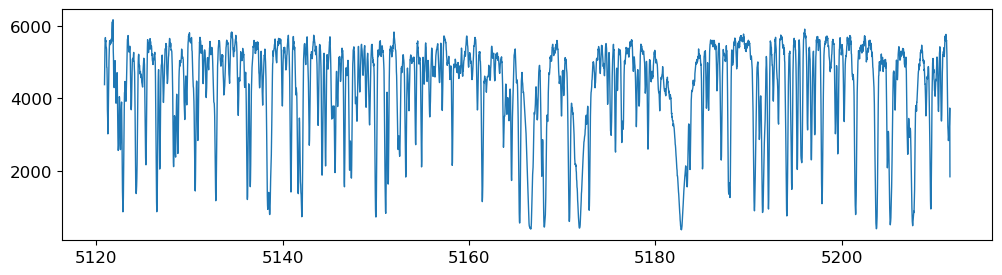

In [9]:
plt.figure(figsize=(12,3))
plt.plot(wav[2],flux[2])
plt.show()

# checking a different wavecal

In [10]:
# '/Users/ccra8514/Desktop/Archive/data/keck_rwav.fits'

In [11]:
f2=fits.open('/Users/ccra8514/Desktop/KeckHIRES_spectra/Archive/data/keck_rwav.fits')
# flux=f1[0].data
wavfile=f2[0].data

In [12]:
flux_norm = flux/np.percentile(flux,95,axis=1)[:,np.newaxis]
# flux_norm2 = flux2/np.percentile(flux2,95,axis=1)[:,np.newaxis]

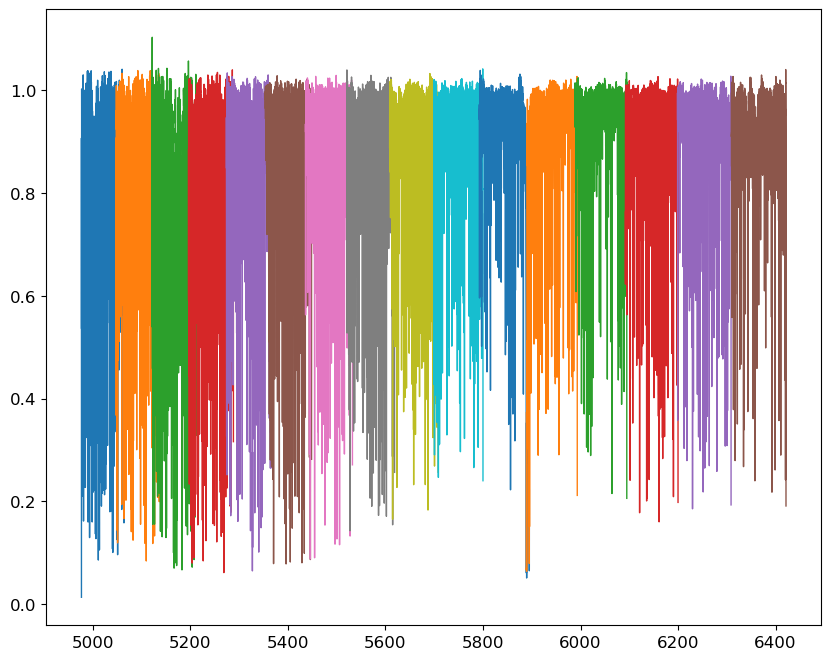

In [13]:
# plt.figure(figsize=(12,3))
for i in range(0,len(wav)):
    plt.plot(wav[i],flux_norm[i],label='order '+str(i))
#     plt.plot(wav2[i],flux_norm2[i],label='order '+str(i))
# plt.legend(bbox_to_anchor=(1,1))
# plt.xlim(6200,6400)

## r band
# plt.axvline(5056.03,color='tab:blue')
# plt.axvline(5055.98,color='tab:orange')
# plt.xlim(5055,5057)
# plt.xlim(5130,5132)
# plt.axvline(5130.64)
# plt.axvline(5130.60) # 2.3 km/s shift
# plt.xlim(5200,5202)
# plt.axvline(5201.48)
# plt.axvline(5201.43) # 2.8 km/s shift

# # b band
# plt.xlim(3695,3696)
# plt.ylim(-0.1,1.3)

## i band
## does not have overlapping regions :)

plt.show()

In [14]:
((5201.48-5201.43)/5201.48)*2.99792458e5

2.8817995839226285

# Combining orders

In [15]:
flux_norm = flux/np.percentile(flux,95,axis=1)[:,np.newaxis]

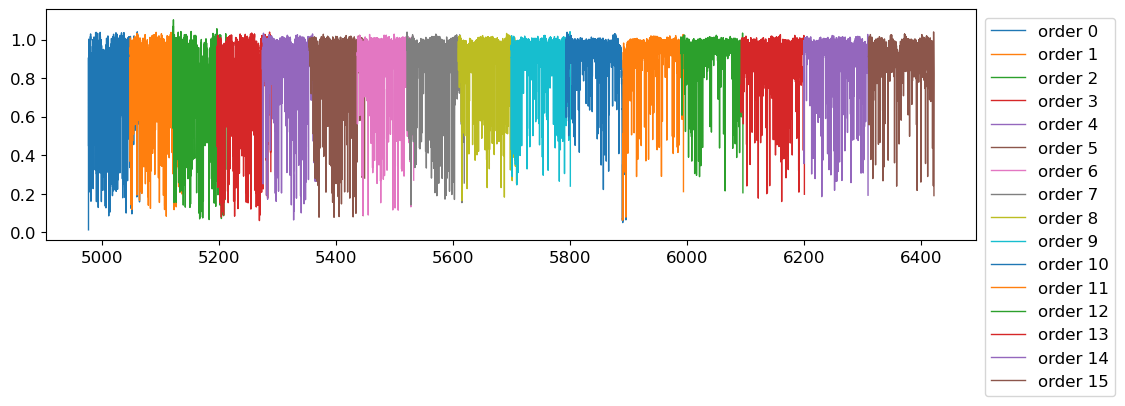

In [16]:
plt.figure(figsize=(12,3))
for i in range(0,len(wav)):
    plt.plot(wav[i],flux_norm[i],label='order '+str(i))
plt.legend(bbox_to_anchor=(1,1))
# plt.xlim(6200,6400)
plt.show()

In [17]:
## just slicing naively
full_wav1 = np.asarray([])
full_flux1 = np.asarray([])

for i in range(0,len(wav)):
    if i == 0:
        order_wav = wav[i]
        order_flux = flux_norm[i]
    else:
        order_wav = wav[i][wav[i]>np.max(full_wav1)]
        order_flux = flux_norm[i][wav[i]>np.max(full_wav1)]
    full_wav1 = np.concatenate((full_wav1,order_wav))
    full_flux1 = np.concatenate((full_flux1,order_flux))
# full_wav1

array([4976.64794645, 4976.67138727, 4976.6948278 , ..., 6421.3140896 ,
       6421.33919069, 6421.36429021])

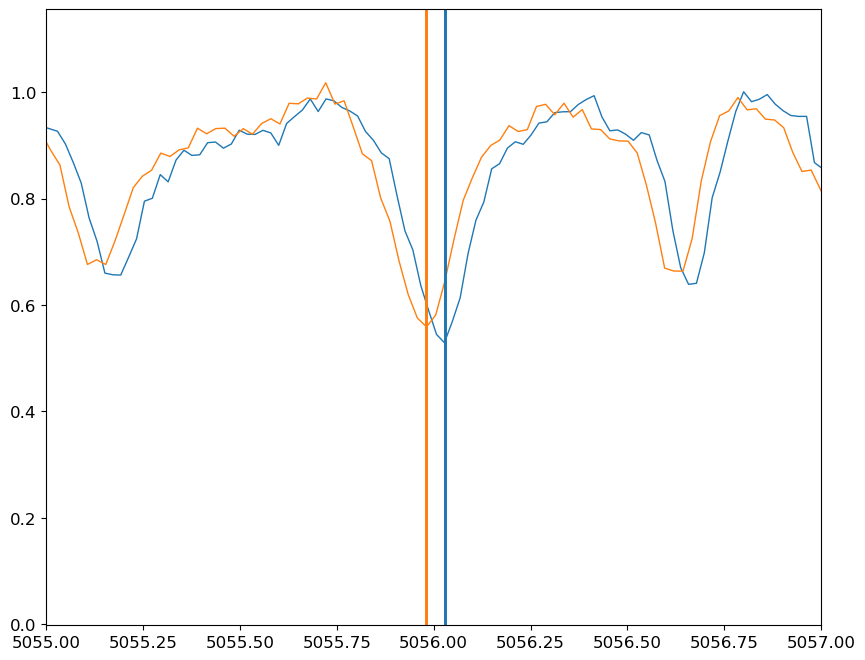

In [18]:
## adding in a weighting at the edges
full_wav = np.asarray([])
full_flux = np.asarray([])

# plt.figure(figsize=(12,3))
## orders 15 and 16 don't overlap :)
for i in range(0,len(wav)):
#     print(i)
    if i == 0:
        order_wav = wav[i][wav[i]<np.min(wav[i+1])]
        order_flux = flux_norm[i][wav[i]<np.min(wav[i+1])]  
        
        ## need to resample this to match the upper region (better to downsample than to upsample)
        overlap_wav_lower =  wav[i][wav[i]>np.min(wav[i+1])]
        overlap_flux_lower =  flux_norm[i][wav[i]>np.min(wav[i+1])]
        
        overlap_wav_upper =  wav[i+1][wav[i+1]<np.max(wav[i])]
        overlap_flux_upper =  flux_norm[i+1][wav[i+1]<np.max(wav[i])]

        # this will perform a linear interpolation (should be fine, but be aware)
        overlap_flux_lower_resampled = np.interp(overlap_wav_upper,overlap_wav_lower,overlap_flux_lower)
        # the wavecal in the overlap region is actually not that good!
        # order 1 and 2 have about 3 km/s shift away from each other
        # ((5056.03-5055.98)/5055.98)*2.99792458e5 = 2.9647314467332806

        ## creating weights for the overlaps
        lower_weight = np.linspace(1,0,len(overlap_wav_upper))
        upper_weight = np.linspace(0,1,len(overlap_wav_upper))
        
        ## then the actual overlap region is
        overlap_wav = overlap_wav_upper
        overlap_flux = overlap_flux_lower_resampled*lower_weight+overlap_flux_upper*upper_weight
        
        full_wav = np.concatenate((full_wav,order_wav))
        full_flux = np.concatenate((full_flux,order_flux))
        full_wav = np.concatenate((full_wav,overlap_wav))
        full_flux = np.concatenate((full_flux,overlap_flux))
        
        
    elif i != len(wav)-1:
        order_wav = wav[i][np.logical_and(wav[i]<np.min(wav[i+1]),wav[i]>np.max(full_wav))]
        order_flux = flux_norm[i][np.logical_and(wav[i]<np.min(wav[i+1]),wav[i]>np.max(full_wav))]
        
        overlap_wav_lower =  wav[i][wav[i]>np.min(wav[i+1])]
        overlap_flux_lower =  flux_norm[i][wav[i]>np.min(wav[i+1])]
        # this will perform a linear interpolation (should be fine, but be aware)
#         overlap_flux_lower_resampled = np.interp(overlap_wav_upper,overlap_wav_lower,overlap_flux_lower)
        if len(overlap_wav_lower) != 0:
            
            overlap_wav_upper =  wav[i+1][wav[i+1]<np.max(wav[i])]
            overlap_flux_upper =  flux_norm[i+1][wav[i+1]<np.max(wav[i])]
            overlap_flux_lower_resampled = np.interp(overlap_wav_upper,overlap_wav_lower,overlap_flux_lower)

            ## creating weights for the overlaps
            lower_weight = np.linspace(1,0,len(overlap_wav_upper))
            upper_weight = np.linspace(0,1,len(overlap_wav_upper))

            ## then the actual overlap region is
            overlap_wav = overlap_wav_upper
            overlap_flux = overlap_flux_lower_resampled*lower_weight+overlap_flux_upper*upper_weight

            full_wav = np.concatenate((full_wav,order_wav))
            full_flux = np.concatenate((full_flux,order_flux))
            full_wav = np.concatenate((full_wav,overlap_wav))
            full_flux = np.concatenate((full_flux,overlap_flux))
            
        else:
            ## if there's no overlap with the upper order, then just chop off a bit of the end and append it normally
            full_wav = np.concatenate((full_wav,order_wav[:-10]))
            full_flux = np.concatenate((full_flux,order_flux[:-10]))
            
    else: # for the final order
        order_wav = wav[i][wav[i]>np.max(full_wav)]
        order_flux = flux_norm[i][wav[i]>np.max(full_wav)]
        
        # chop off a bit of the beginning and append (since there's no overlap)
        full_wav = np.concatenate((full_wav,order_wav[10:]))
        full_flux = np.concatenate((full_flux,order_flux[10:]))
        
# #         plt.plot(order_wav,order_flux)
    plt.plot(overlap_wav_lower,overlap_flux_lower)
# #         plt.plot(overlap_wav_upper,overlap_flux_lower_resampled*lower_weight)
# #         plt.plot(overlap_wav_upper,lower_weight)
#         plt.plot(overlap_wav_upper,overlap_flux_upper*upper_weight)
#     plt.plot(overlap_wav_upper,upper_weight)
    plt.plot(overlap_wav_upper,overlap_flux_upper)
#         plt.plot(overlap_wav,overlap_flux)
    plt.axvline(5056.03,color='tab:blue')
    plt.axvline(5055.98,color='tab:orange')
    plt.xlim(5055,5057)

full_wav

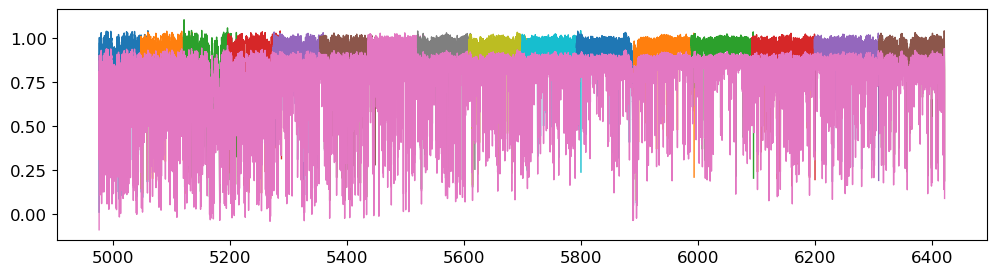

In [19]:
plt.figure(figsize=(12,3))
for i in range(0,len(wav)):
    plt.plot(wav[i],flux_norm[i],label='order '+str(i))
plt.plot(full_wav,full_flux-0.1)
# plt.xlim(6200,6400)
plt.show()

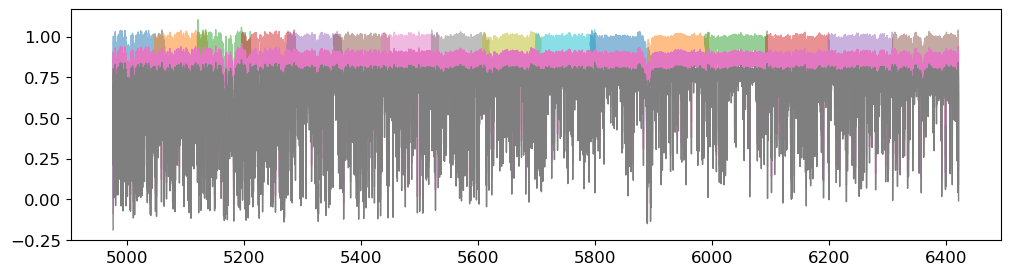

In [20]:
plt.figure(figsize=(12,3))
for i in range(0,len(wav)):
    plt.plot(wav[i],flux_norm[i],label='order '+str(i),alpha=0.5)
plt.plot(full_wav,full_flux-0.1)
plt.plot(full_wav1,full_flux1-0.2)
# plt.xlim(5045,5070)
plt.show()

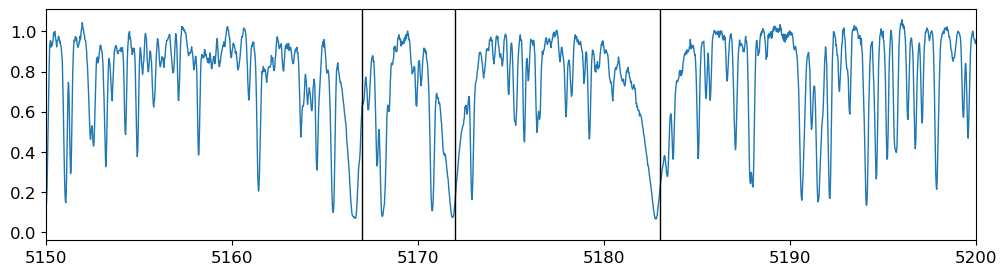

In [21]:
plt.figure(figsize=(12,3))
plt.plot(full_wav,full_flux)
plt.xlim(5150,5200)
plt.axvline(5183,color='k')
plt.axvline(5172,color='k')
plt.axvline(5167,color='k')
plt.show()

In [22]:
error_arr = np.zeros_like(full_wav)
full_wav = full_wav/10

In [23]:
output_df = pd.DataFrame(data=np.c_[full_wav,full_flux,error_arr],columns=['waveobs','flux','err'])
output_df

,waveobs,flux,err
0,497.664795,0.013261,0.0
1,497.667139,0.907063,0.0
2,497.669483,0.842677,0.0
3,497.671827,0.792121,0.0
4,497.674171,0.678314,0.0
...,...,...,...
57698,642.126388,0.870907,0.0
57699,642.128899,0.867746,0.0
57700,642.131409,0.838415,0.0
57701,642.133919,0.822645,0.0


In [24]:
output_df.to_csv('/Users/ccra8514/Desktop/echelle_allorders.txt',index=False,sep='\t')

# Shifting the RV with iSpec

In [25]:
def determine_radial_velocity_with_mask(spec):
    mu_cas_spectrum = spec
    #--- Radial Velocity determination with linelist mask --------------------------
#     logging.info("Radial velocity determination with linelist mask...")
    # - Read atomic data
#     mask_file = ispec_dir + "input/linelists/CCF/Narval.Sun.370_1048nm/mask.lst"
    #mask_file = ispec_dir + "input/linelists/CCF/Atlas.Arcturus.372_926nm/mask.lst""
    #mask_file = ispec_dir + "input/linelists/CCF/Atlas.Sun.372_926nm/mask.lst"
    #mask_file = ispec_dir + "input/linelists/CCF/HARPS_SOPHIE.A0.350_1095nm/mask.lst"
    #mask_file = ispec_dir + "input/linelists/CCF/HARPS_SOPHIE.F0.360_698nm/mask.lst"
    #mask_file = ispec_dir + "input/linelists/CCF/HARPS_SOPHIE.G2.375_679nm/mask.lst"
    #mask_file = ispec_dir + "input/linelists/CCF/HARPS_SOPHIE.K0.378_679nm/mask.lst"
    mask_file = ispec_dir + "input/linelists/CCF/HARPS_SOPHIE.K5.378_680nm/mask.lst"
    #mask_file = ispec_dir + "input/linelists/CCF/HARPS_SOPHIE.M5.400_687nm/mask.lst"
    #mask_file = ispec_dir + "input/linelists/CCF/Synthetic.Sun.350_1100nm/mask.lst"
    #mask_file = ispec_dir + "input/linelists/CCF/VALD.Sun.300_1100nm/mask.lst"
    ccf_mask = ispec.read_cross_correlation_mask(mask_file)
    print(ccf_mask)

    models, ccf = ispec.cross_correlate_with_mask(mu_cas_spectrum, ccf_mask, \
                            lower_velocity_limit=-400, upper_velocity_limit=400, \
                            velocity_step=1.0, mask_depth=0.01, \
                            fourier=False)

    # Number of models represent the number of components
    components = len(models)
    # First component:
    rv = np.round(models[0].mu(), 2) # km/s
    rv_err = np.round(models[0].emu(), 2) # km/s
    return rv, rv_err

def correct_radial_velocity(spectrum,rv):
    #mu_cas_spectrum = ispec.read_spectrum(ispec_dir + "/input/spectra/examples/NARVAL_muCas.txt.gz")
    #--- Radial Velocity correction ------------------------------------------------
    logging.info("Radial velocity correction...")
    spectrum = ispec.correct_velocity(spectrum, rv)
    return spectrum

def cut_spectrum_from_range(spec,low,high):
    star_spectrum = spec
    #--- Cut -----------------------------------------------------------------------
    logging.info("Cutting...")

    # - Keep points between two given wavelengths
    wfilter = ispec.create_wavelength_filter(star_spectrum, wave_base=low, wave_top=high)
    cutted_star_spectrum = star_spectrum[wfilter]
    return cutted_star_spectrum 

In [26]:
# ispec_dir = os.path.dirname(os.path.realpath(__file__)) + "/"
## for the record this would probably work for specmatch-syn I suppose
ispec_dir = '/Users/ccra8514/iSpec_v20230804/'
sys.path.insert(0, os.path.abspath(ispec_dir))
import ispec

In [27]:
star_spectrum = ispec.read_spectrum('/Users/ccra8514/Desktop/echelle_allorders.txt')

In [28]:
print(star_spectrum)

[(497.66479464, 0.0132609 , 0.) (497.66713873, 0.90706321, 0.)
 (497.66948278, 0.84267724, 0.) ... (642.13140896, 0.8384146 , 0.)
 (642.13391907, 0.82264529, 0.) (642.13642902, 0.19102375, 0.)]


In [29]:
# mu_cas_spectrum = spec
#--- Radial Velocity determination with linelist mask --------------------------
#     logging.info("Radial velocity determination with linelist mask...")
# - Read atomic data
# mask_file = ispec_dir + "input/linelists/CCF/Narval.Sun.370_1048nm/mask.lst"
#mask_file = ispec_dir + "input/linelists/CCF/Atlas.Arcturus.372_926nm/mask.lst""
#mask_file = ispec_dir + "input/linelists/CCF/Atlas.Sun.372_926nm/mask.lst"
#mask_file = ispec_dir + "input/linelists/CCF/HARPS_SOPHIE.A0.350_1095nm/mask.lst"
#mask_file = ispec_dir + "input/linelists/CCF/HARPS_SOPHIE.F0.360_698nm/mask.lst"
#mask_file = ispec_dir + "input/linelists/CCF/HARPS_SOPHIE.G2.375_679nm/mask.lst"
mask_file = ispec_dir + "input/linelists/CCF/HARPS_SOPHIE.K0.378_679nm/mask.lst"
# mask_file = ispec_dir + "input/linelists/CCF/HARPS_SOPHIE.K5.378_680nm/mask.lst"
#mask_file = ispec_dir + "input/linelists/CCF/HARPS_SOPHIE.M5.400_687nm/mask.lst"
#mask_file = ispec_dir + "input/linelists/CCF/Synthetic.Sun.350_1100nm/mask.lst"
#mask_file = ispec_dir + "input/linelists/CCF/VALD.Sun.300_1100nm/mask.lst"
ccf_mask = ispec.read_cross_correlation_mask(mask_file)
# print(ccf_mask)

In [30]:
models, ccf = ispec.cross_correlate_with_mask(star_spectrum, linelist = ccf_mask, \
                        lower_velocity_limit=-200, upper_velocity_limit=200, \
                        velocity_step=1.0, mask_depth=0.01, \
                        fourier=False)


Building velocity profile with mask


In [31]:
# Number of models represent the number of components
components = len(models)
# First component:
rv = np.round(models[0].mu(), 2) # km/s
rv_err = np.round(models[0].emu(), 2) # km/s
print('RV:',rv, rv_err)

RV: -49.66 0.03


In [32]:
keck_data['RV'][0]

-54.42

In [33]:
star_spectrum_RVcorr = ispec.correct_velocity(star_spectrum, rv)

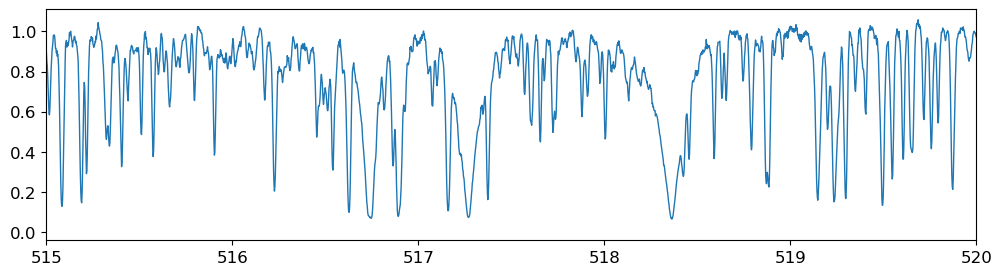

In [34]:
plt.figure(figsize=(12,3))
plt.plot(star_spectrum_RVcorr.waveobs,star_spectrum_RVcorr.flux)
plt.xlim(515,520)
## are these not the right wavelengths???
# plt.axvline(518.3,color='k')
# plt.axvline(517.2,color='k')
# plt.axvline(516.7,color='k')
## I guess i'll just have to accept that idk the right numbers??
plt.show()

# Using iSpec

In [35]:
# # ispec_dir = os.path.dirname(os.path.realpath(__file__)) + "/"
# ## for the record this would probably work for specmatch-syn I suppose
# ispec_dir = '/Users/ccra8514/iSpec_v20230804/'
# sys.path.insert(0, os.path.abspath(ispec_dir))
# import ispec

In [36]:
# ## I have no clue what this does
# #--- Change LOG level ----------------------------------------------------------
# #LOG_LEVEL = "warning"
# LOG_LEVEL = "info"
# logger = logging.getLogger() # root logger, common for all
# logger.setLevel(logging.getLevelName(LOG_LEVEL.upper()))
# ################################################################################

In [37]:
# star_spectrum = ispec.read_spectrum('/Users/ccra8514/Desktop/echelle_allorders.txt')

In [38]:
## is this spectrum in vacuum or air wavelengths?
## I am going to assume air
# star_spectrum_vacuum = ispec.air_to_vacuum(star_spectrum)
## dan says vacuum

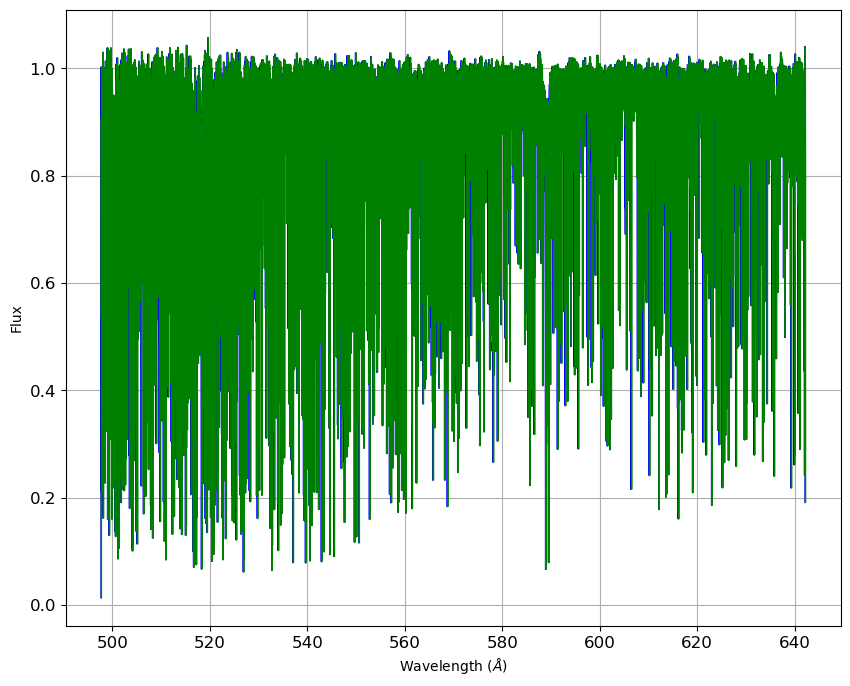

In [39]:
ispec.plotting.plot_spectra([star_spectrum,star_spectrum_RVcorr],xlabel=r'Wavelength ($\AA$)')

In [40]:
## honestly I have an okay RV from HIRES already, which I can apply here
## oh jesus it's actually not a good RV what the heck
# star_spectrum_RVcorr = ispec.correct_velocity(star_spectrum, keck_data['RV'][0])

In [41]:
# plt.figure(figsize=(12,3))
# plt.plot(star_spectrum_RVcorr.waveobs,star_spectrum_RVcorr.flux)
# plt.xlim(5150,5200)
# plt.axvline(5183,color='k')
# plt.axvline(5172,color='k')
# plt.axvline(5167,color='k')
# plt.show()

In [42]:
# ispec.plotting.plot_spectra([star_spectrum_RVcorr],xlabel=r'Wavelength ($\AA$)')

In [43]:
# tunable parameters


# Free parameters
#free_params = ["teff", "logg", "MH", "vmic", "vmac", "vsini", "R", "vrad", "limb_darkening_coeff"]
#free_params = ["teff", "logg", "MH", "vmic", "R"]
#free_params = ["teff", "MH", "vsini", "R"]
#free_params = ["teff", "logg", "MH", "vsini", "vmac", "vmic"]
free_params = ["teff", "logg", "MH", "vsini", "alpha"]

# Starting Parameters
initial_teff =5000.
initial_logg = 3.0
initial_MH = 0.0
initial_vmic = ispec.estimate_vmic(initial_teff, initial_logg, initial_MH)
initial_vmac = ispec.estimate_vmac(initial_teff, initial_logg, initial_MH)
initial_vsini = 1.0
initial_limb_darkening_coeff = 0.6
initial_R = 70000
initial_vrad = 0
max_iterations = 6
initial_alpha = 0.00

In [44]:
## all the choosing happens here I think

# Selected model amtosphere, linelist and solar abundances
#model = ispec_dir + "/input/atmospheres/MARCS/"
model = ispec_dir + "/input/atmospheres/MARCS.GES/"
#model = ispec_dir + "/input/atmospheres/MARCS.APOGEE/"
#model = ispec_dir + "/input/atmospheres/ATLAS9.APOGEE/"
#model = ispec_dir + "/input/atmospheres/ATLAS9.Castelli/"
#model = ispec_dir + "/input/atmospheres/ATLAS9.Kurucz/"
#model = ispec_dir + "/input/atmospheres/ATLAS9.Kirby/"


atomic_linelist_file = ispec_dir + "/input/linelists/transitions/VALD.300_1100nm/atomic_lines.tsv"
#atomic_linelist_file = ispec_dir + "/input/linelists/transitions/VALD.1100_2400nm/atomic_lines.tsv"
# atomic_linelist_file = ispec_dir + "/input/linelists/transitions/GESv5_atom_hfs_iso.420_920nm/atomic_lines.tsv"
#atomic_linelist_file = ispec_dir + "/input/linelists/transitions/GESv5_atom_nohfs_noiso.420_920nm/atomic_lines.tsv"

solar_abundances_file = ispec_dir + "/input/abundances/Grevesse.2007/stdatom.dat"
#solar_abundances_file = ispec_dir + "/input/abundances/Asplund.2005/stdatom.dat"
#solar_abundances_file = ispec_dir + "/input/abundances/Asplund.2009/stdatom.dat"
#solar_abundances_file = ispec_dir + "/input/abundances/Grevesse.1998/stdatom.dat"
#solar_abundances_file = ispec_dir + "/input/abundances/Anders.1989/stdatom.dat"

isotope_file = ispec_dir + "/input/isotopes/SPECTRUM.lst"

In [45]:
## load all those selected files
# Load chemical information and linelist
print('loading atomic linelist',atomic_linelist_file)
atomic_linelist = ispec.read_atomic_linelist(atomic_linelist_file, wave_base=np.min(star_spectrum['waveobs']), wave_top=np.max(star_spectrum['waveobs']))
atomic_linelist = atomic_linelist[atomic_linelist['theoretical_depth'] >= 0.01] # Select lines that have some minimal contribution in the sun

print('loading isotopes',isotope_file)
isotopes = ispec.read_isotope_data(isotope_file)

# Load model atmospheres
print('loading model atmospheres',model)
modeled_layers_pack = ispec.load_modeled_layers_pack(model)

# Load SPECTRUM abundances
print('loading solar abundances',solar_abundances_file)
solar_abundances = ispec.read_solar_abundances(solar_abundances_file)

loading atomic linelist /Users/ccra8514/iSpec_v20230804//input/linelists/transitions/VALD.300_1100nm/atomic_lines.tsv
loading isotopes /Users/ccra8514/iSpec_v20230804//input/isotopes/SPECTRUM.lst
loading model atmospheres /Users/ccra8514/iSpec_v20230804//input/atmospheres/MARCS.GES/
loading solar abundances /Users/ccra8514/iSpec_v20230804//input/abundances/Grevesse.2007/stdatom.dat


In [50]:
# line_regions

array([(480.0649, 480.033     , 480.085     , 'Fe 1'),
       (480.1025, 480.085     , 480.138     , 'Cr 1'),
       (480.6987, 480.6935    , 480.7072    , 'Ni 1'),
       (481.1983, 481.161     , 481.213     , 'Ni 1'),
       (482.4127, 482.392     , 482.436     , 'Cr 2'),
       (482.9023, 482.881     , 482.92      , 'Ni 1'),
       (490.5133, 490.492     , 490.551     , 'Fe 1'),
       (490.7732, 490.741     , 490.789     , 'Fe 1'),
       (491.2018, 491.19      , 491.229     , 'Ni 1'),
       (491.3973, 491.38      , 491.425     , 'Ni 1'),
       (491.8364, 491.818     , 491.854     , 'Ni 1'),
       (491.8994, 491.878     , 491.957     , 'Fe 1'),
       (491.9861, 491.957     , 492.        , 'Ti 1'),
       (492.0502, 492.        , 492.086     , 'Fe 1'),
       (492.4301, 492.419     , 492.447     , 'Fe 1'),
       (492.477 , 492.447     , 492.508     , 'Fe 1'),
       (493.5831, 493.556     , 493.608     , 'Ni 1'),
       (493.6335, 493.608     , 493.656     , 'Cr 1'),
       (49

In [52]:
# Free individual element abundance
free_abundances = None
linelist_free_loggf = None

# Line regions
# line_regions = ispec.read_line_regions("spectrum_synth_good_for_params_all.txt")
# line_regions = ispec.read_line_regions("lines_noD.txt")
line_regions = ispec.read_line_regions(ispec_dir + "/input/regions/47000_VALD/spectrum_synth_good_for_params_all.txt")
# segments = ispec.create_segments_around_lines(line_regions, margin=0.25)

# Select only the lines to get abundances from
element_name = 'Fe'
line_regions = line_regions[np.logical_or(line_regions['note'] == element_name+' 1', line_regions['note'] == element_name+' 2')]
line_regions = ispec.adjust_linemasks(normalized_star_spectrum, line_regions, max_margin=0.5)

segments = ispec.create_segments_around_lines(line_regions, margin=0.25)



# mgtriplet_lines = ispec.read_line_regions(ispec_dir + "input/regions/wings_MgTriplet.txt")
# mgtriplet_segments = ispec.read_segment_regions(ispec_dir + "input/regions/wings_MgTriplet_segments.txt")
# line_regions = np.hstack((line_regions, mgtriplet_lines))
# segments = np.hstack((segments, mgtriplet_segments))


normalized_star_spectrum = star_spectrum_RVcorr
star_continuum_model = ispec.fit_continuum(star_spectrum_RVcorr, fixed_value=1.0, model="Fixed value")

# line_regions = ispec.adjust_linemasks(normalized_star_spectrum, line_regions, max_margin=0.5)

chemical_elements_file = ispec_dir + "/input/abundances/chemical_elements_symbols.dat"
chemical_elements = ispec.read_chemical_elements(chemical_elements_file)

element_name = ["Fe"]#,'Li']
free_abundances = ispec.create_free_abundances_structure(element_name, chemical_elements, solar_abundances)
print(free_abundances)
#raw_input(':')



# Read segments if we have them or...
#segments = ispec.read_segment_regions("segments.txt")
# ... or we can create the segments on the fly:
# segments = ispec.create_segments_around_lines(line_regions, margin=0.25)


#free_abundances['Abund'] += initial_MH # Scale to metallicity

[(26, -4.59, 'Fe')]


In [53]:
obs_spec, modeled_synth_spectrum, params, errors, abundances_found, loggf_found, status, stats_linemasks = \
            ispec.model_spectrum(normalized_star_spectrum, star_continuum_model, \
            modeled_layers_pack, atomic_linelist, isotopes, solar_abundances, free_abundances, linelist_free_loggf, initial_teff, \
            initial_logg, initial_MH, initial_alpha, initial_vmic, initial_vmac, initial_vsini, \
            initial_limb_darkening_coeff, initial_R, initial_vrad, free_params, segments=segments, \
            linemasks=line_regions, \
            enhance_abundances=True, \
            use_errors = True, \
            vmic_from_empirical_relation = False, \
            vmac_from_empirical_relation = True, \
            max_iterations=max_iterations, \
            tmp_dir = None, \
            code='spectrum')

[2023-11-07 15:52:44,280] [WARNING] [ssf:model_spectrum:887]: 'enhance_abundances' changed to False because alpha is a free parameter
[2023-11-07 15:52:44,292] [WARNING] [ssf:model_spectrum:933]: Use of errors has been desactivated because all of them are set to zero.


Generating: 5000 3.00 0.00 0.00 1.26 3.80 1.00 0.60 70000 loggf [] abund [-4.59] vrad []
Iter       1    CHI-SQUARE =  14.77946147  DOF =  2359
   teff = 5000  
   logg = 3  
   MH = 0  
   alpha = 0  
   Vmic = 1.26  
   Vmac = 3.8  
   Vsini = 1  
   limb_darkening_coeff = 0.6  
   R = 70000  
   26 = -4.59  
Generating: 5100 3.00 0.00 0.00 1.26 3.82 1.00 0.60 70000 loggf [] abund [-4.59] vrad []
Generating: 5000 3.10 0.00 0.00 1.26 3.75 1.00 0.60 70000 loggf [] abund [-4.59] vrad []
Generating: 5000 3.00 0.05 0.00 1.26 3.74 1.00 0.60 70000 loggf [] abund [-4.59] vrad []
Generating: 5000 3.00 0.00 0.05 1.26 3.80 1.00 0.60 70000 loggf [] abund [-4.59] vrad []
Cache: 5000 3.00 0.00 0.00 1.26 3.80 3.00 0.60 70000 loggf [] abund [-4.59] vrad []
Generating: 5000 3.00 0.00 0.00 1.26 3.80 1.00 0.60 70000 loggf [] abund [-4.54] vrad []
Generating: 4549 2.42 -0.23 0.04 1.26 4.27 4.62 0.60 70000 loggf [] abund [-4.59] vrad []
Iter       2    CHI-SQUARE =  9.746768707  DOF =  2359
   teff = 454

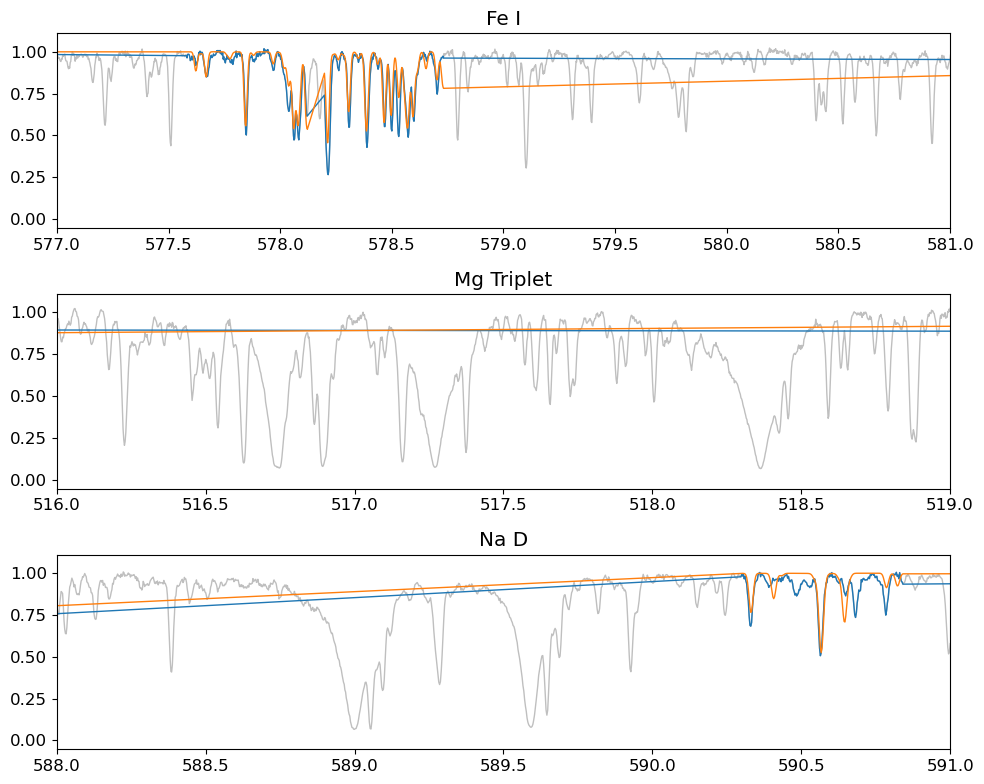

In [54]:
plt.subplot(3,1,1)
plt.plot(star_spectrum_RVcorr['waveobs'],star_spectrum_RVcorr['flux'],color='grey',alpha=0.5)
plt.plot(obs_spec['waveobs'],obs_spec['flux'])
plt.plot(modeled_synth_spectrum['waveobs'],modeled_synth_spectrum['flux'])
plt.xlim([577,581])
plt.title('Fe I')

plt.subplot(3,1,2)
plt.plot(star_spectrum_RVcorr['waveobs'],star_spectrum_RVcorr['flux'],color='grey',alpha=0.5)
plt.plot(obs_spec['waveobs'],obs_spec['flux'])
plt.plot(modeled_synth_spectrum['waveobs'],modeled_synth_spectrum['flux'])
plt.title('Mg Triplet')
plt.xlim([516,519])

#plt.subplot(2,2,3)
#plt.plot(star_spectrum_RVcorr['waveobs'],star_spectrum_RVcorr['flux'],color='grey',alpha=0.5)
#plt.plot(obs_spec['waveobs'],obs_spec['flux'])
#plt.plot(modeled_synth_spectrum['waveobs'],modeled_synth_spectrum['flux'])
#plt.title('H alpha')
#plt.xlim([655.8,656.8])

plt.subplot(3,1,3)
plt.plot(star_spectrum_RVcorr['waveobs'],star_spectrum_RVcorr['flux'],color='grey',alpha=0.5)
plt.plot(obs_spec['waveobs'],obs_spec['flux'])
plt.plot(modeled_synth_spectrum['waveobs'],modeled_synth_spectrum['flux'])
plt.xlim([588,591])
plt.title('Na D')
plt.tight_layout()

plt.savefig('/Users/ccra8514/Desktop/ispec_modelfit_3347458',dpi=300)
plt.show()

In [55]:
## how consistent is it with the keck data?
keck_data.iloc[0]

KIC                  3347458
numax              40.291621
delta_nu            3.362861
mass                4.958121
Teff                  4863.0
logg                   2.525
[Fe/H]                 0.165
adopt_flag            apogee
Kpmag                   10.3
ra                 292.77283
dec                 38.43248
Teff_specmatch        4930.0
logg_specmatch      2.612985
feh_specmatch           0.32
vsini_specmatch     4.297755
RV                    -54.42
Name: 0, dtype: object

In [ ]:
# 4500 Å to 7000 Å
# Fe I and Fe II lines

def adjust_line_masks():
    star_spectrum = ispec.read_spectrum(ispec_dir + "/input/spectra/examples/NARVAL_Sun_Vesta-1.txt.gz")
    #--- Adjust line masks ---------------------------------------------------------
    resolution = 80000
    smoothed_star_spectrum = ispec.convolve_spectrum(star_spectrum, resolution)
    line_regions = ispec.read_line_regions(ispec_dir + "/input/regions/fe_lines.txt")
    linemasks = ispec.adjust_linemasks(smoothed_star_spectrum, line_regions, max_margin=0.5)
    
def create_segments_around_linemasks():
    #---Create segments around linemasks -------------------------------------------
    line_regions = ispec.read_line_regions(ispec_dir + "/input/regions/fe_lines.txt")
    segments = ispec.create_segments_around_lines(line_regions, margin=0.25)